# Computer Infrastructure Task Notebook
This notebook walks through the learning journey from creating and organsing a repository to analysing some downloaded data.

The notebook covers:
- Creating a directory structure and navigating within it.
- Using the `date` command and appending the information to a file.
- Formatting timestamp information and creating timestamped filenames.
- Downloading data files using `wget`.
- Writing a bash script (`weather.sh`) to automate the steps in downloading the weather data.
- Using `pandas` to do a quick analysis of some of the weather data.

At the end of the notebook there is a list of resources used to learn more about each command.

The `weather.sh` file described in this notebook is used in the GitHub Actions workflow in this repository to download the weather data for Athenry at 10am everyday to `/weather/data` directory.

## Creating the Directory Structure
`mkdir` is used on the command line to create a directory or multiple directories at once. The syntax is `mkdir [OPTION] [DIRECTORY]` [(1)](https://linuxize.com/post/how-to-create-directories-in-linux-with-the-mkdir-command/). 

The below will create a directory in your current location called data:

In [23]:
mkdir data

To open the newly created folder the `cd` command can be used. The syntax is `cd [DIRECTORY NAME][(2)](https://linuxize.com/post/linux-cd-command/)

In [24]:
cd data

c:\Users\kirst\OneDrive - Atlantic TU\Computer_infrastructure\data\data


To create folders within this directory use `mkdir`. `mkdir` can accept multiple arguments to create a number of folders at a time. For example to create two folders called weather and timestamps you could use the below.

In [25]:
mkdir weather timestamps

To check the creation of the folders you can use `ls` to show the contents of the current working directory [(3)](https://linuxize.com/post/how-to-list-files-in-linux-using-the-ls-command/).

In [26]:
ls

 Volume in drive C is SSD1
 Volume Serial Number is 4E1B-3027

 Directory of c:\Users\kirst\OneDrive - Atlantic TU\Computer_infrastructure\data\data

09/12/2024  17:51    <DIR>          .
09/12/2024  17:51    <DIR>          ..
09/12/2024  17:51    <DIR>          timestamps
09/12/2024  17:51    <DIR>          weather
               0 File(s)              0 bytes
               4 Dir(s)  31,598,149,632 bytes free


## Getting the Current Date and Appending it to a file
The `date` command outputs the current date and time stamp [(4)](https://linuxconfig.org/Date) in the command line environment. To output this information into a file you can use `>` then the file name for the date to be overwritten each time or `>>` then the file name to append the new data [(5)](https://thelinuxcode.com/difference-arrow-double-arrow-bash/). The `date` command should be run on the command line and the `now.txt` file will be updated with the output.

`date >> now.txt`

To check the contents of the file the `more` command can be used [(6)](https://www.geeksforgeeks.org/more-command-in-linux-with-examples/). 

`more now.txt`


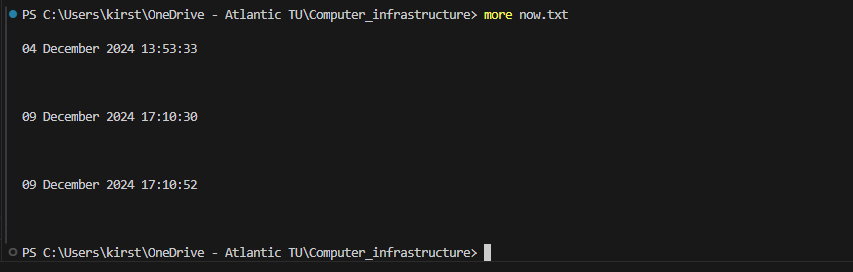

## Formatting Timestamps
For more information about a command `man` then the command name can be used [(7)](https://www.geeksforgeeks.org/man-command-in-linux-with-examples/).

`man date` will give more information about the date command.

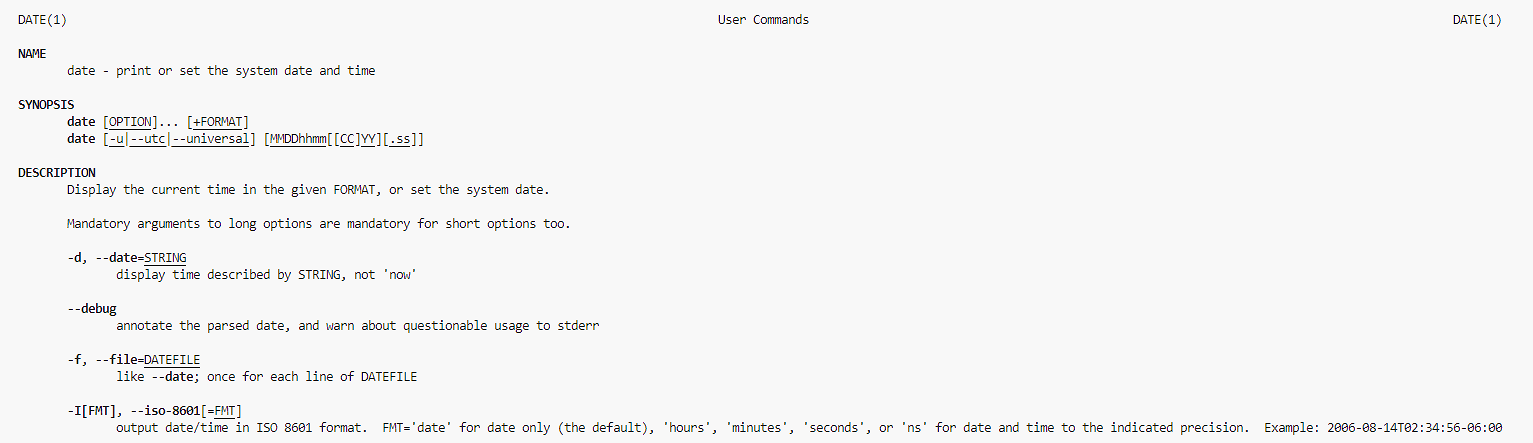

The output of the date command can be formatted using `%` then a specific letter referring to part of the timestamp [(8)](https://phoenixnap.com/kb/linux-date-command). To output the year `%Y` can be used for the full year or `%y` for the last two digits of the year. The month is retrieved with `%m` for a numerical output, or `%B` for the month in text or `%b` for the abbreviate name eg Jan. The day of the date is outputted with `%d`, the hour `%H`, the minutes `%M` and the seconds `%S`.  A quick way of getting the time is `%T`, this is automatically formatted with colons between the items.

To output the timestamp in numbers as year month day the format for the date would be `%Y%m%d`. To output the time in hours, minutes and seconds without separators the format would be be `"%h%M%S`. If you would like separators between the returns these are typed in the output eg `%H:%M` would give you a time in this format 12:15. So for a date in the format year month day_hour minutes seconds you would use:

```
date +"%Y%m%d_%H%M%S"
```


Gives an output that looks like 20241104_112942. To append this information to a file use `>>` and the file name.

```date +%Y%m%d_%H%M%S >> formatted.txt```

## Creating Timestamped files
To create a file the `touch` command can be used [(9)](https://phoenixnap.com/kb/touch-command-in-linux). `touch testnow.txt` would create a file called testnow.txt. To create a file with the a current timestamp you would use backticks [(10)](https://www.thegeekdiary.com/backtick-symbol-in-linux-shell-scripting/) around the date command and the formatting elements and include .txt to tell it the type of file. The backticks say to use the output of the command.

```touch `date +"%Y%m%d_%H%M%S"` ```

There is beginning to be a move away from backticks to `$(command..)` as this can be easier to read [(11)](https://unix.stackexchange.com/questions/126927/have-backticks-i-e-cmd-in-sh-shells-been-deprecated). The alternative to the above command using this format would be:

```$(date +"%Y%m%d_%H%M%S")```

## Downloading Today's Weather Data
To download today's weather data into the data/weather directory we first need to move to that location using `cd`.

```cd .\data\weather```

The data we want to download is available at: https://prodapi.metweb.ie/observations/athenry/today.

We will retrieve this information using `wget` [(12)](https://www.geeksforgeeks.org/wget-command-in-linux-unix/). `wget` is not interactive and hence can be set to run with no need for user interaction and therefore, can work particularly well over poor or unstable networks, or for scheduled tasks.


To find out if wget is downloaded you can call the wget version with:

```wget -V```

If `wget` is not installed use, we need to download it. First we need to give permissions to do this as a superuser we need to use the command `sudo`[(13)](https://www.sudo.ws/docs/man/1.8.10/sudo.man/) and `apt`[(14)](https://linuxize.com/post/how-to-use-apt-command/) which enables the installing, updating and removing of packages. So to install `wget` we would use:

```sudo apt install wget```

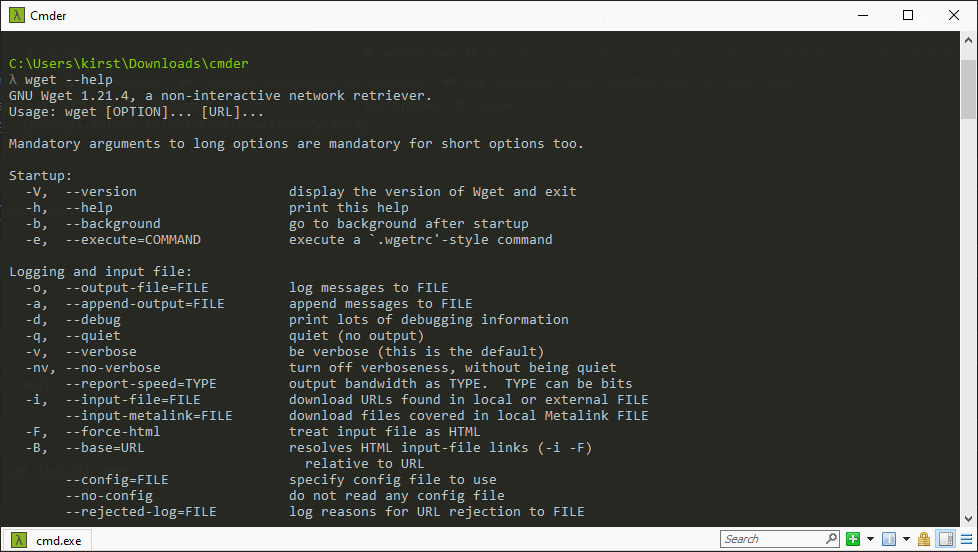

Once `wget` is installed we can use it download our data. By putting `-O` after the command we can tell wget where to store the data [(14)](https://man7.org/linux/man-pages/man1/wget.1.html). We then follow this with the url where the data is to be found.

```wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today```

## Timestamping downloaded data files
Using what we learnt about formatting the output of the date command we can put this together with the `wget` command to download the data into a timestamped file. 

```wget -O `date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today```

## Writing a Script to Automatically Download Data
To automatically download the data a bash script can be used [(15)](https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/). 

The first line of the file is always, `#!`, this is called a "shebang" or "bash bang" and this is followed by where to execute the script. For this file we are using `#! /bin/bash` to say run the code in bash. On a new line we start writing our code. We can reuse our command line code above using `wget -O`. By adding `data/weather`infront of the `date` command, the files will automatically downladed into the weather directory. 

```
#! /bin/bash

wget -O data/weather/`date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today
```


To run the script we first have to change the permissions to make it an executable script, this is done using `chmod`[(16)](https://linuxize.com/post/chmod-command-in-linux/). The syntax for chmod is `chmod [OPTIONS] [ugoa…][-+=]perms…[,…] FILE...`. We need to change the user permissions to executable to we use `chmod u+x`. To run a bash script you need to insert `./`infront, so our command is:

```
chmod u+x ./weather.sh
```

Now the code can be run with:
```
./weather.sh
```


## Analysing the data
The data we have been using throughout is Met Eirann's latest observation data, this is made available as part of the governmental dataset [(16)](https://data.gov.ie/dataset/latest-observations). It includes hourly data on: 
* temperature in degrees Celsius
* weather descrption
* wind speed in knots
* wind gust in knots
* wind direction
* humidity
* rainfall in mm
* pressure in hPa
* day name
* date
* report time

### Make a dataframe
`pandas` is a powerful data analysis and manipulation tool that we can use to look at one of the weather data downloads [(17)](https://pandas.pydata.org/). First we need to import `pandas`, it is commonly imported `as pd` for greater coding efficiency.

In [17]:
import pandas as pd

Then we need to create a dataframe from one of the datafiles using `read_json` [(18)](https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/). To get a view of the first 5 lines of the dataframe we can use `print(df.head(5))` [(19)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [19]:
df = pd.read_json('data/weather/20241108_111414.json')

print(df.head(5))

      name  temperature symbol weatherDescription      text  windSpeed  \
0  Athenry           13    04n             Cloudy  "Cloudy"         11   
1  Athenry           13    04n             Cloudy  "Cloudy"         13   
2  Athenry           12    04n             Cloudy  "Cloudy"         11   
3  Athenry           13    04n             Cloudy  "Cloudy"         15   
4  Athenry           13    04n             Cloudy  "Cloudy"         11   

  windGust cardinalWindDirection  windDirection  humidity  rainfall  pressure  \
0        -                    SE            135        86         0      1022   
1        -                    SE            135        87         0      1021   
2        -                    SE            135        89         0      1021   
3        -                    SE            135        86         0      1021   
4        -                    SE            135        84         0      1021   

  dayName       date reportTime  
0  Friday 2024-08-11      00:00  


### Analysing the data

The describe function is a great way to get basic statistical data from a data frame [(20)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe). It automatically calculates the mean, minimum, maximum, standard deviation and percentiles. .

In [7]:
print(df.describe())

       temperature  windSpeed  windDirection   humidity  rainfall  \
count    11.000000  11.000000           11.0  11.000000      11.0   
mean     12.727273  12.090909          135.0  85.818182       0.0   
min      12.000000   9.000000          135.0  83.000000       0.0   
25%      12.500000  11.000000          135.0  84.500000       0.0   
50%      13.000000  13.000000          135.0  86.000000       0.0   
75%      13.000000  13.000000          135.0  87.000000       0.0   
max      13.000000  15.000000          135.0  89.000000       0.0   
std       0.467099   1.640399            0.0   1.721522       0.0   

          pressure                 date  
count    11.000000                   11  
mean   1021.090909  2024-08-11 00:00:00  
min    1021.000000  2024-08-11 00:00:00  
25%    1021.000000  2024-08-11 00:00:00  
50%    1021.000000  2024-08-11 00:00:00  
75%    1021.000000  2024-08-11 00:00:00  
max    1022.000000  2024-08-11 00:00:00  
std       0.301511                  NaN  


Using matplotlib or seaborn is also a great way to see the data statistically. To use matplotlib you first need to import it [(21)](https://matplotlib.org/), we will be using the `pyplot`functions and this is commonly imported as `plt` for efficiency [(22)](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

In [21]:
import matplotlib.pyplot as plt

To set the x and y variables we need to call the contents of columns from the dataframe, this is done using the syntax `dataframe['column name']` [(23)](https://www.datacamp.com/tutorial/python-select-columns). Labels can be added to the axes and chart using `plt.xlabel` for the x axis label for example [(24)](https://www.w3schools.com/python/matplotlib_labels.asp). 

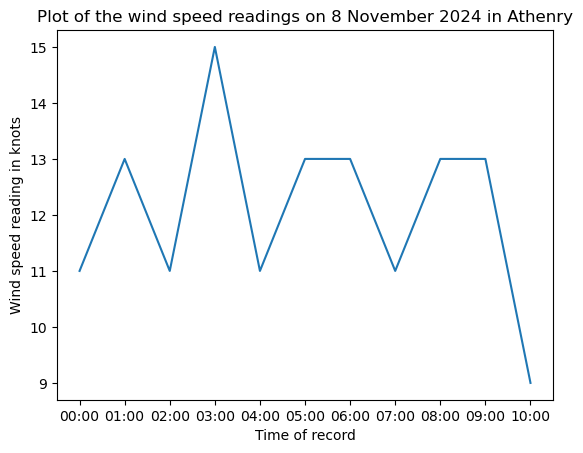

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('data/weather/20241108_111414.json')

y = df['windSpeed']
x = df['reportTime']

plt.plot(x,y)

plt.xlabel('Time of record')
plt.ylabel('Wind speed reading in knots')
plt.title('Plot of the wind speed readings on 8 November 2024 in Athenry')

plt.show()


This plot could be made even more readable by adding in formatting for the markers[(25)](https://www.w3schools.com/python/matplotlib_markers.asp) and a grid [(26)](https://www.w3schools.com/python/matplotlib_grid.asp)

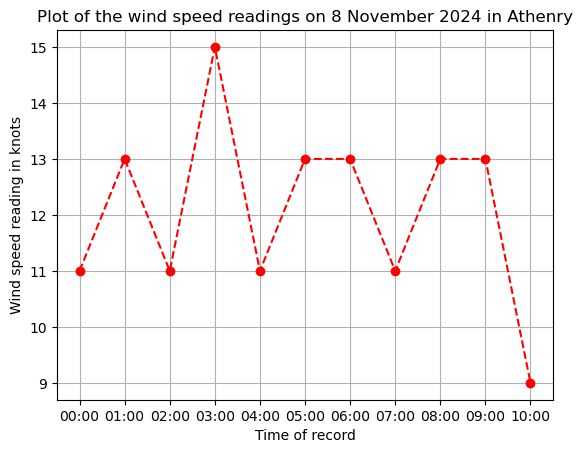

In [31]:
plt.xlabel('Time of record')
plt.ylabel('Wind speed reading in knots')
plt.title('Plot of the wind speed readings on 8 November 2024 in Athenry')

plt.plot(x,y,'ro--')
plt.grid()
plt.show()

## Resources relevant to the commands used
(1) mkdir - [https://linuxize.com/post/how-to-create-directories-in-linux-with-the-mkdir-command/]

(2) cd - [https://linuxize.com/post/linux-cd-command/]

(3) ls - [https://linuxize.com/post/how-to-list-files-in-linux-using-the-ls-command/]

(4) date - [https://linuxconfig.org/Date]

(5) overwrite and append - [https://thelinuxcode.com/difference-arrow-double-arrow-bash/]

(6) more - [https://www.geeksforgeeks.org/more-command-in-linux-with-examples/]

(7) man - [https://www.geeksforgeeks.org/man-command-in-linux-with-examples/]

(8) date formatting - [https://phoenixnap.com/kb/linux-date-command]

(9) touch - [https://phoenixnap.com/kb/touch-command-in-linux]

(10) backticks - [https://www.thegeekdiary.com/backtick-symbol-in-linux-shell-scripting/]

(11) $ (command ..) - [https://unix.stackexchange.com/questions/126927/have-backticks-i-e-cmd-in-sh-shells-been-deprecated]

(12) wget - [https://www.geeksforgeeks.org/wget-command-in-linux-unix/]

(13) sudo - [(https://www.sudo.ws/docs/man/1.8.10/sudo.man/)]

(14) apt - [https://linuxize.com/post/how-to-use-apt-command/]

(14) wget options - [https://man7.org/linux/man-pages/man1/wget.1.html]

(15) bash - [https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/]

(16) chmod - [https://linuxize.com/post/chmod-command-in-linux/]

(17) pandas - [https://pandas.pydata.org/]

(18) read_json - [https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/]

(19) df.head() - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html]

(20) df.describe() - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe]

(21) matplotlib - [https://matplotlib.org/3.5.3/index.html]

(22) matplotlib.pyplot - [https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html]

(23) select columns from a dataframe - [https://www.datacamp.com/tutorial/python-select-columns]

(24) plot labels - [https://www.w3schools.com/python/matplotlib_labels.asp]

(25) plot markers - [https://www.w3schools.com/python/matplotlib_markers.asp]

(25) plot grid - [https://www.w3schools.com/python/matplotlib_grid.asp]

```END```